# 01. 量子比特

量子比特是量子计算机进行逻辑处理的计算单元。在经典计算机中，经典比特只能处于状态0或者状态1，在量子比特上，我们也用两种状态来描述描述它，表示为 $\left|0\right>$ 和 $\left|1\right>$，我们称符号 $\left|\cdot\right>$ 为右矢符号。根据量子态叠加原理，量子比特表现出有别于经典比特的特性，即可以处于 $\left|0\right>$ 和 $\left|1\right>$ 的线性叠加态，我们可以记为 $\left|\psi \right>$：

$$\left|\psi \right> = \alpha\left|0\right> + \beta \left|1\right>$$

且有归一化条件 $\left|\alpha\right|^2+\left|\beta\right|^2=1$。

测量该量子比特，测量结果为 $0$ 的概率为 $P(0) = |\alpha|^2$，测量结果为 $1$ 的概率为 $P(1) = |\beta|^2$ 。

为了用线性代数来描述量子比特和量子态，我们可以简单的将$\left|0\right>$和$\left|1\right>$映射为二维空间中的两个正交基矢，不失一般性，我们选择：

$$
\left|0\right> = \begin{pmatrix}
1 \\
0
\end{pmatrix}, 
\left|1\right> = \begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

此时，任意单比特量子态则可写为：

$$\left|\psi\right>=\alpha \begin{pmatrix}1 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \end{pmatrix}= \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$$

如果在一个状态 $|\psi\rangle$ 前添加一个**全局相位** $e^{i\phi}$，这两个状态在物理上无法区分，例如
$$|\psi'\rangle = e^{i\phi} |\psi\rangle$$

在MindSpore Quantum中，量子模拟器维护着一个量子态，通过后面的学习我们可以利用量子模拟器来模拟一个量子系统的演化，并获取量子系统的信息。下面我们初步认识一下量子模拟器。

In [1]:
import numpy as np
from mindquantum.simulator import Simulator

sim = Simulator('mqvector', 1)
quantum_state = sim.get_qs()
print(f"initial quantum state is {quantum_state}")
print(f"quantum state in ket: {sim.get_qs(True)}")

initial quantum state is [1.+0.j 0.+0.j]
quantum state in ket: 1¦0⟩


> API 解释：
> 
> - [`mindquantum.simulator`](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.simulator.html) 中包含了模拟器相关的 API， `from mindquantum.simulator import Simulator` 从中导入类 `Simulator`；
> - `sim = Simulator("mqvector", 1)` 声名一个模拟器 `sim`，模拟器的后端使用 `projectq`，模拟器的量子比特数目是 `1` ；
> - `sim.get_qs()` 返回模拟器当前的量子态，默认返回一个 `numpy` 数组，如果 `sim.get_qs(True)` 返回一个狄拉克符号的表示，可读性更强。
> 
> 最新版本的 MindQuantum 可用的模拟器后端包括：
> 
> 1. `projectq`：开源模拟器
> 2. `mqvector`：MindQuantum 自己实现的全振幅模拟器（CPU版本）
> 3. `mqvector_gpu`：MindQuantum 自己实现的全振幅模拟器（GPU版本）
> 
> 对于量子比特数目较少的情况（一般小于 14 个比特），推荐使用CPU版本的 `mqvector`。

通过上面的演示，我们发现模拟器的初始状态是在$\left|0\right>$态上，这里我们也可以通过模拟器的`set_qs`接口来改变模拟器的状态：

In [2]:
sim.set_qs(np.array([0, 1]))
quantum_state1 = sim.get_qs()
print(f"quantum state changed to {quantum_state1}")

quantum state changed to [0.+0.j 1.+0.j]


> API 解释：
> 
> `sim.set_qs(state)` 将模拟器的状态设置为 `state`，其中 `state` 是 `numpy` 数组（不需要归一化，该接口会自动归一化）。

由上我们发现，模拟器的状态变成了$\left|1\right>$态。

# 测量

前面提到，我们可以对量子比特进行测量。对于一个处于$\left|\psi \right>$态的量子比特，

$$\left|\psi \right> = \alpha\left|0\right> + \beta \left|1\right>$$

则测量结果为 $0$ 的概率为 $P(0) = |\alpha|^2$，测量结果为 $1$ 的概率为 $P(1) = |\beta|^2$。这种对 0 或 1 的测量被称为在**标准基**下测量，标准基可以表示为$\lbrace|0\rangle, |1\rangle \rbrace$。

在 MindQuantum 中，测量门 `Measure` 可以对量子比特进行测量，结合函数 `sampling` 可以对一个量子线路在**标准基**下进行大量重复测量，该函数不会改变量子态。

如果我们对 $|0\rangle$ 在标准基下进行测量，那么测量结果总是 $0,0,\ldots$

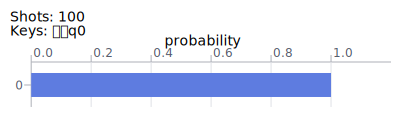

In [3]:
from mindquantum.simulator import Simulator
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import Measure

circ = Circuit()                            # 声明一个量子线路
circ += Measure("测量q0").on(0)              # 对q0进行测量
sim = Simulator("mqvector", circ.n_qubits)  # 声明一个只有一个qubit的模拟器
res = sim.sampling(circuit=circ, shots=100) # 进行100次采样
# print(res)
res.svg()

> API 解释：
> 
> - [mindquantum.core.circuit](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.core.circuit.html) 里面包含了量子线路相关的 API；
> - [mindquantum.core.gates](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.core.gates.html) 里面包含了量子门相关的 API；
> - `circ = Circuit()` 定义一个名为 `circ` 的量子线路，初始为空；
> - `Measure(name).on(0)` 定义一个测量，名字为 `name`，作用在 `q0` 上，测量使用**标准基**进行**投影测量**；
> - `circ += Measure(name).on(0)`：在量子线路中添加一个作用在 `q0` 上的测量门；
> - `sim.sampling(circuit=circ, shots=100)` 对模拟器 `sim` 的当前状态 $|\psi\rangle$ ，作用量子线路 `circ` 后进行 `100` 次采样，需要满足线路 `circ` 中必需存在测量门。注意 `sampling` **不会改变模拟器状态**，采样后模拟器状态依然处于 $|\psi\rangle$ 。

# Bloch 球

下面介绍一种用来描述单量子比特的数学工具——Bloch球。

对于任意单量子比特
$$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$$
其中 $\alpha,\beta\in \mathbb{C}$，满足归一化条件
$$|\alpha|^2 + |\beta|^2 = 1 = \cos^2(\frac{\theta}{2}) + \sin^2(\frac{\theta}{2}), \quad \theta \in [0, \pi]$$

忽略全局相位，我们可以将单量子比特写作
$$|\psi\rangle = \cos(\frac{\theta}{2})|0\rangle + e^{i\phi}\sin(\frac{\theta}{2}), \quad \theta \in [0, \pi], \phi \in [0, 2\pi)$$

这恰好对应了三围单位球面上的一点 $(\cos{\phi}\sin{\theta}, \sin{\phi}\sin{\theta}, \cos{\theta})$，这就是Bloch球：

![bloch sphere](./images/bloch_sphere.png)

在mindquantum中，Bloch球有专门的绘制函数。

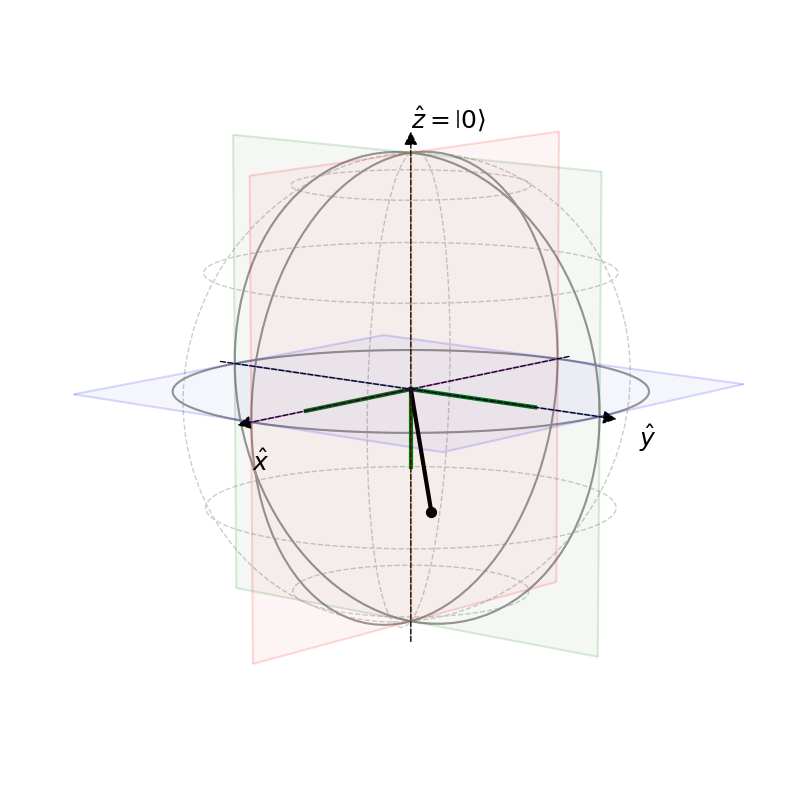

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mindquantum.core.gates import RX, RZ
from mindquantum.io.display import BlochScene

%matplotlib widget

state = np.array([1, 1 + 1j]) / np.sqrt(3)
scene = BlochScene()
fig, ax = scene.create_scene()
scene.add_state(ax, state)
plt.show()

> API 解释：
> 
> - Bloch 相关的 API 在 [mindquantum.io](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.io.html) 里面
> - `scene.add_state(ax, state)` 在 Bloch 图中添加一个量子态 `state`
> - 魔法 `%matplotlib widget` 可以在 jupyter notebook 中看到动态的图像

In [5]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy')

Software,Version
mindquantum,0.11.0
numpy,1.26.4
System,Info
Python,3.11.10
OS,Darwin arm64
Memory,17.18 GB
CPU Max Thread,10
Date,Tue Sep 16 17:59:31 2025


# 习题

## Exercise 1

请将模拟器的状态设置为：

$$\left|\psi\right> = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\ 1
\end{pmatrix} = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$

## Exercise 2

对 $|\psi\rangle = \frac{|0\rangle + (1+i)|1\rangle}{\sqrt{3}}$ 使用 $\lbrace|0\rangle, |1\rangle \rbrace$ 进行测量。

## Exercise 3

画出下面几个单量子比特在Bloch球上的位置。
$$
\begin{align*}
|\psi_1\rangle & = \frac{|0\rangle + |1\rangle}{\sqrt{2}} \\
|\psi_2\rangle & = \frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
|\psi_3\rangle & = \frac{|0\rangle + i |1\rangle}{\sqrt{2}} \\
|\psi_4\rangle & = \frac{|0\rangle - i |1\rangle}{\sqrt{2}}
\end{align*}
$$